## Step 1: Data Collection

In [11]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(0)

# Define student domains and terms
domains = ['CS', 'AI', 'BBA', 'ME', 'Mathematical', 'EE']
terms = [21, 22, 23, 24]

# Select a random number of students between 2400 and 2500
num_students = np.random.randint(2400, 2501)

# Create student data
student_data = pd.DataFrame({
    'Student_ID': range(1, num_students + 1),
    'Domain': np.random.choice(domains, num_students),
    'Term': np.random.choice(terms, num_students)
})

# Number of rooms and capacities
num_rooms = 30
capacities = [30, 35, 25]

# Create room data
room_data = pd.DataFrame({
    'Room_ID': range(101, 101 + num_rooms),
    'Capacity': np.random.choice(capacities, num_rooms)
})

# Check for missing or erroneous data
print(student_data.isnull().sum(), room_data.isnull().sum())


Student_ID    0
Domain        0
Term          0
dtype: int64 Room_ID     0
Capacity    0
dtype: int64


## Step 2: Data Preprocessing

In [13]:
from sklearn.preprocessing import LabelEncoder

# Convert categorical data to numerical data
# Transform "Domain" column
le_domain = LabelEncoder()
student_data['Domain'] = le_domain.fit_transform(student_data['Domain'])

# Transform "Term" column
le_term = LabelEncoder()
student_data['Term'] = le_term.fit_transform(student_data['Term'])

student_data.head()


,Student_ID,Domain,Term
0,1,3,0
1,2,2,0
2,3,4,3
3,4,4,0
4,5,4,0


## Step 3: K-Means Clusterin 

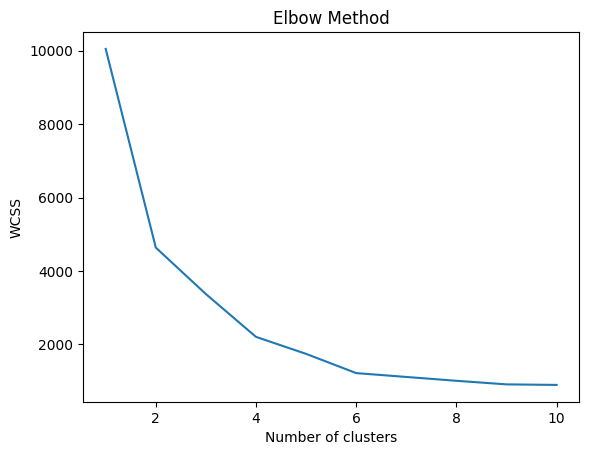

,Student_ID,Domain,Term,Cluster
0,1,3,0,2
1,2,2,0,2
2,3,4,3,0
3,4,4,0,2
4,5,4,0,2


In [14]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Prepare student data for clustering (use columns other than Student_ID)
X = student_data[['Domain', 'Term']]

# Use the Elbow method to determine the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the Elbow graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Determine the optimal number of clusters (e.g., 3)
optimal_cluster_count = 3

# Apply K-means algorithm
kmeans = KMeans(n_clusters=optimal_cluster_count, init='k-means++', max_iter=300, n_init=10, random_state=0)
student_data['Cluster'] = kmeans.fit_predict(X)

# Examine the resulting clusters
student_data.head()


## Step 4: Creating Seating Plan

In [15]:
# Create seating plan based on room capacities and clusters
seating_plan = []
leftover_students = []

room_index = 0
room_capacity = room_data.iloc[room_index]['Capacity']
room_id = room_data.iloc[room_index]['Room_ID']
room_students = []

for i, student in student_data.iterrows():
    if len(room_students) < room_capacity:
        room_students.append(student['Student_ID'])
    else:
        seating_plan.append({
            'Room_ID': room_id,
            'Students': room_students
        })
        room_index += 1
        if room_index < len(room_data):
            room_capacity = room_data.iloc[room_index]['Capacity']
            room_id = room_data.iloc[room_index]['Room_ID']
            room_students = [student['Student_ID']]
        else:
            leftover_students.append(student['Student_ID'])

# Add the last room
if room_students:
    seating_plan.append({
        'Room_ID': room_id,
        'Students': room_students
    })

# Add leftover students
if leftover_students:
    seating_plan.append({
        'Room_ID': 'Leftover Students',
        'Students': leftover_students
    })

seating_plan


[{'Room_ID': np.int64(101),
  'Students': [np.int64(1),
   np.int64(2),
   np.int64(3),
   np.int64(4),
   np.int64(5),
   np.int64(6),
   np.int64(7),
   np.int64(8),
   np.int64(9),
   np.int64(10),
   np.int64(11),
   np.int64(12),
   np.int64(13),
   np.int64(14),
   np.int64(15),
   np.int64(16),
   np.int64(17),
   np.int64(18),
   np.int64(19),
   np.int64(20),
   np.int64(21),
   np.int64(22),
   np.int64(23),
   np.int64(24),
   np.int64(25),
   np.int64(26),
   np.int64(27),
   np.int64(28),
   np.int64(29),
   np.int64(30),
   np.int64(31),
   np.int64(32),
   np.int64(33),
   np.int64(34),
   np.int64(35)]},
 {'Room_ID': np.int64(102),
  'Students': [np.int64(36),
   np.int64(37),
   np.int64(38),
   np.int64(39),
   np.int64(40),
   np.int64(41),
   np.int64(42),
   np.int64(43),
   np.int64(44),
   np.int64(45),
   np.int64(46),
   np.int64(47),
   np.int64(48),
   np.int64(49),
   np.int64(50),
   np.int64(51),
   np.int64(52),
   np.int64(53),
   np.int64(54),
   np.int

## Step 5: Faculty Allocation

In [16]:
# Create sample faculty data (This data can be fetched from the university system)
faculty_data = pd.DataFrame({
    'Faculty_ID': range(1, 21),
    'Domain': np.random.choice(domains, 20)
})

# Allocate faculty to rooms
faculty_allocation = []

for plan in seating_plan:
    if plan['Room_ID'] == 'Leftover Students':
        faculty_allocation.append({
            'Room_ID': plan['Room_ID'],
            'Faculty_ID': []
        })
        continue
    
    room_domains = student_data[student_data['Student_ID'].isin(plan['Students'])]['Domain'].unique()
    room_faculty = faculty_data[faculty_data['Domain'].isin(room_domains)]['Faculty_ID'].tolist()
    
    if len(room_faculty) < 1:
        room_faculty = faculty_data['Faculty_ID'].tolist()[:1]
    
    faculty_allocation.append({
        'Room_ID': plan['Room_ID'],
        'Faculty_ID': room_faculty
    })

faculty_allocation


[{'Room_ID': np.int64(101), 'Faculty_ID': [1]},
 {'Room_ID': np.int64(102), 'Faculty_ID': [1]},
 {'Room_ID': np.int64(103), 'Faculty_ID': [1]},
 {'Room_ID': np.int64(104), 'Faculty_ID': [1]},
 {'Room_ID': np.int64(105), 'Faculty_ID': [1]},
 {'Room_ID': np.int64(106), 'Faculty_ID': [1]},
 {'Room_ID': np.int64(107), 'Faculty_ID': [1]},
 {'Room_ID': np.int64(108), 'Faculty_ID': [1]},
 {'Room_ID': np.int64(109), 'Faculty_ID': [1]},
 {'Room_ID': np.int64(110), 'Faculty_ID': [1]},
 {'Room_ID': np.int64(111), 'Faculty_ID': [1]},
 {'Room_ID': np.int64(112), 'Faculty_ID': [1]},
 {'Room_ID': np.int64(113), 'Faculty_ID': [1]},
 {'Room_ID': np.int64(114), 'Faculty_ID': [1]},
 {'Room_ID': np.int64(115), 'Faculty_ID': [1]},
 {'Room_ID': np.int64(116), 'Faculty_ID': [1]},
 {'Room_ID': np.int64(117), 'Faculty_ID': [1]},
 {'Room_ID': np.int64(118), 'Faculty_ID': [1]},
 {'Room_ID': np.int64(119), 'Faculty_ID': [1]},
 {'Room_ID': np.int64(120), 'Faculty_ID': [1]},
 {'Room_ID': np.int64(121), 'Faculty_ID'

## Step 6: Reporting

In [17]:
# Combine seating plan and faculty allocation into a report
report = []

for i, plan in enumerate(seating_plan):
    report.append({
        'Room_ID': plan['Room_ID'],
        'Students': plan['Students'],
        'Faculty_ID': faculty_allocation[i]['Faculty_ID']
    })

# Display the report as a DataFrame
report_df = pd.DataFrame(report)
report_df.head(10)


,Room_ID,Students,Faculty_ID
0,101,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",[1]
1,102,"[36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 4...",[1]
2,103,"[61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 7...",[1]
3,104,"[91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101,...",[1]
4,105,"[121, 122, 123, 124, 125, 126, 127, 128, 129, ...",[1]
5,106,"[156, 157, 158, 159, 160, 161, 162, 163, 164, ...",[1]
6,107,"[191, 192, 193, 194, 195, 196, 197, 198, 199, ...",[1]
7,108,"[221, 222, 223, 224, 225, 226, 227, 228, 229, ...",[1]
8,109,"[256, 257, 258, 259, 260, 261, 262, 263, 264, ...",[1]
9,110,"[291, 292, 293, 294, 295, 296, 297, 298, 299, ...",[1]
